Importing the dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score

Data collection and Processing

In [ ]:
#loading the csv data to a pandas Dataframe
kidney_data = pd.read_csv('/content/kidney_disease.csv')

In [ ]:
#print the first five rows of the dataset
kidney_data.head(5)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
#print the last five rows of the dataset
kidney_data.tail(5)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd
399,399,58.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,53,6800,6.1,no,no,no,good,no,no,notckd


In [ ]:
# Checking any rows are duplicated or not
print(kidney_data.duplicated())

0      False
1      False
2      False
3      False
4      False
       ...  
395    False
396    False
397    False
398    False
399    False
Length: 400, dtype: bool


In [ ]:
#number of the rows and column have in the dataset
kidney_data.shape

(400, 26)

In [ ]:
#dropping column
kidney_data.drop('id', axis = 1, inplace = True)

In [ ]:
# number of rows and column in the dataset
kidney_data.shape

(400, 25)

In [ ]:
#rename column names to make it more user-friendly
kidney_data.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [ ]:
kidney_data.head(5)

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
# getting the statistical measures of the data
kidney_data.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [ ]:
# getting info about the dataset
kidney_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

As we can see that 'packed_cell_volume', 'white_blood_cell_count' and 'red_blood_cell_count' are object type. We need to change them to numerical dtype.

In [ ]:
# converting necessary columns to numerical type

kidney_data['packed_cell_volume'] = pd.to_numeric(kidney_data['packed_cell_volume'], errors='coerce')
kidney_data['white_blood_cell_count'] = pd.to_numeric(kidney_data['white_blood_cell_count'], errors='coerce')
kidney_data['red_blood_cell_count'] = pd.to_numeric(kidney_data['red_blood_cell_count'], errors='coerce')

In [ ]:
kidney_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [ ]:
#Extracting categorical and numerical columns

cat_cols = [col for col in kidney_data.columns if kidney_data[col].dtype == 'object']
num_cols = [col for col in kidney_data.columns if kidney_data[col].dtype != 'object']

In [ ]:
# looking at unique values in categorical columns

for col in cat_cols:
    print(f"{col} has {kidney_data[col].unique()} values\n")

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values

coronary_artery_disease has ['no' 'yes' '\tno' nan] values

appetite has ['good' 'poor' nan] values

peda_edema has ['no' 'yes' nan] values

aanemia has ['no' 'yes' nan] values

class has ['ckd' 'ckd\t' 'notckd'] values



In [ ]:
# replace incorrect values

kidney_data['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

kidney_data['coronary_artery_disease'] = kidney_data['coronary_artery_disease'].replace(to_replace = '\tno', value='no')

kidney_data['class'] = kidney_data['class'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd'})

In [ ]:
kidney_data['class'] = kidney_data['class'].map({'ckd': 1, 'not ckd': 0})
kidney_data['class'] = pd.to_numeric(kidney_data['class'], errors='coerce')


In [ ]:
cols = ['diabetes_mellitus', 'coronary_artery_disease', 'class']

for col in cols:
    print(f"{col} has {kidney_data[col].unique()} values\n")

diabetes_mellitus has ['yes' 'no' nan] values

coronary_artery_disease has ['no' 'yes' nan] values

class has [1 0] values



In [ ]:
kidney_data.head(5)

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,1
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,1
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,1
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,1
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,1


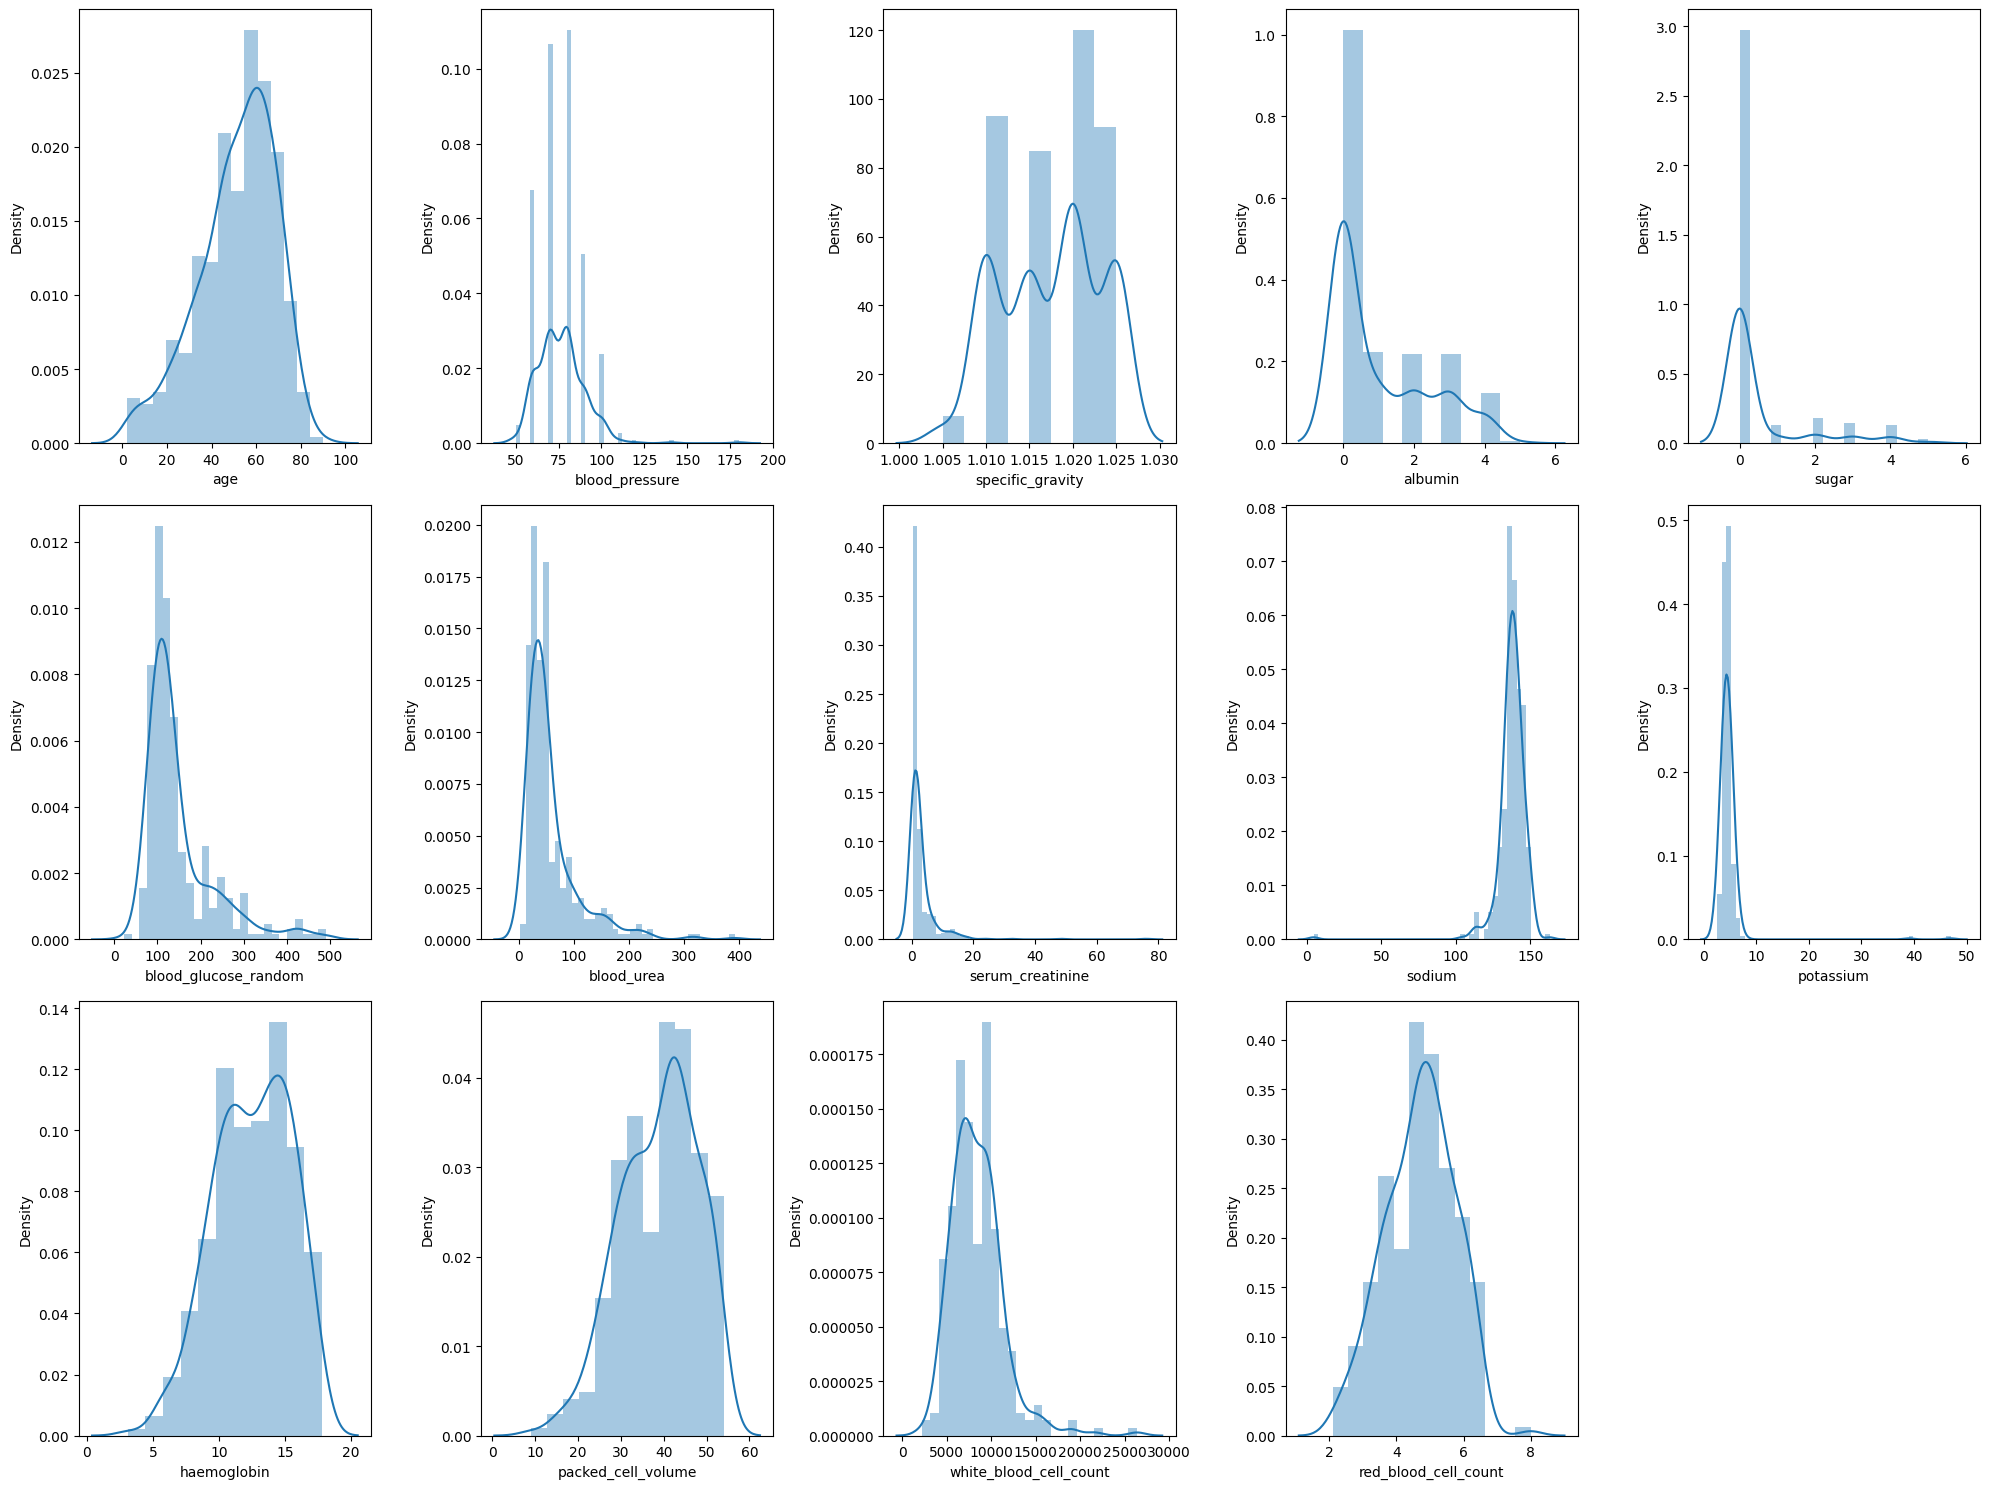

In [ ]:
# checking numerical features distribution

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(kidney_data[column])
        plt.xlabel(column)


    plotnumber += 1

plt.tight_layout()
plt.show()

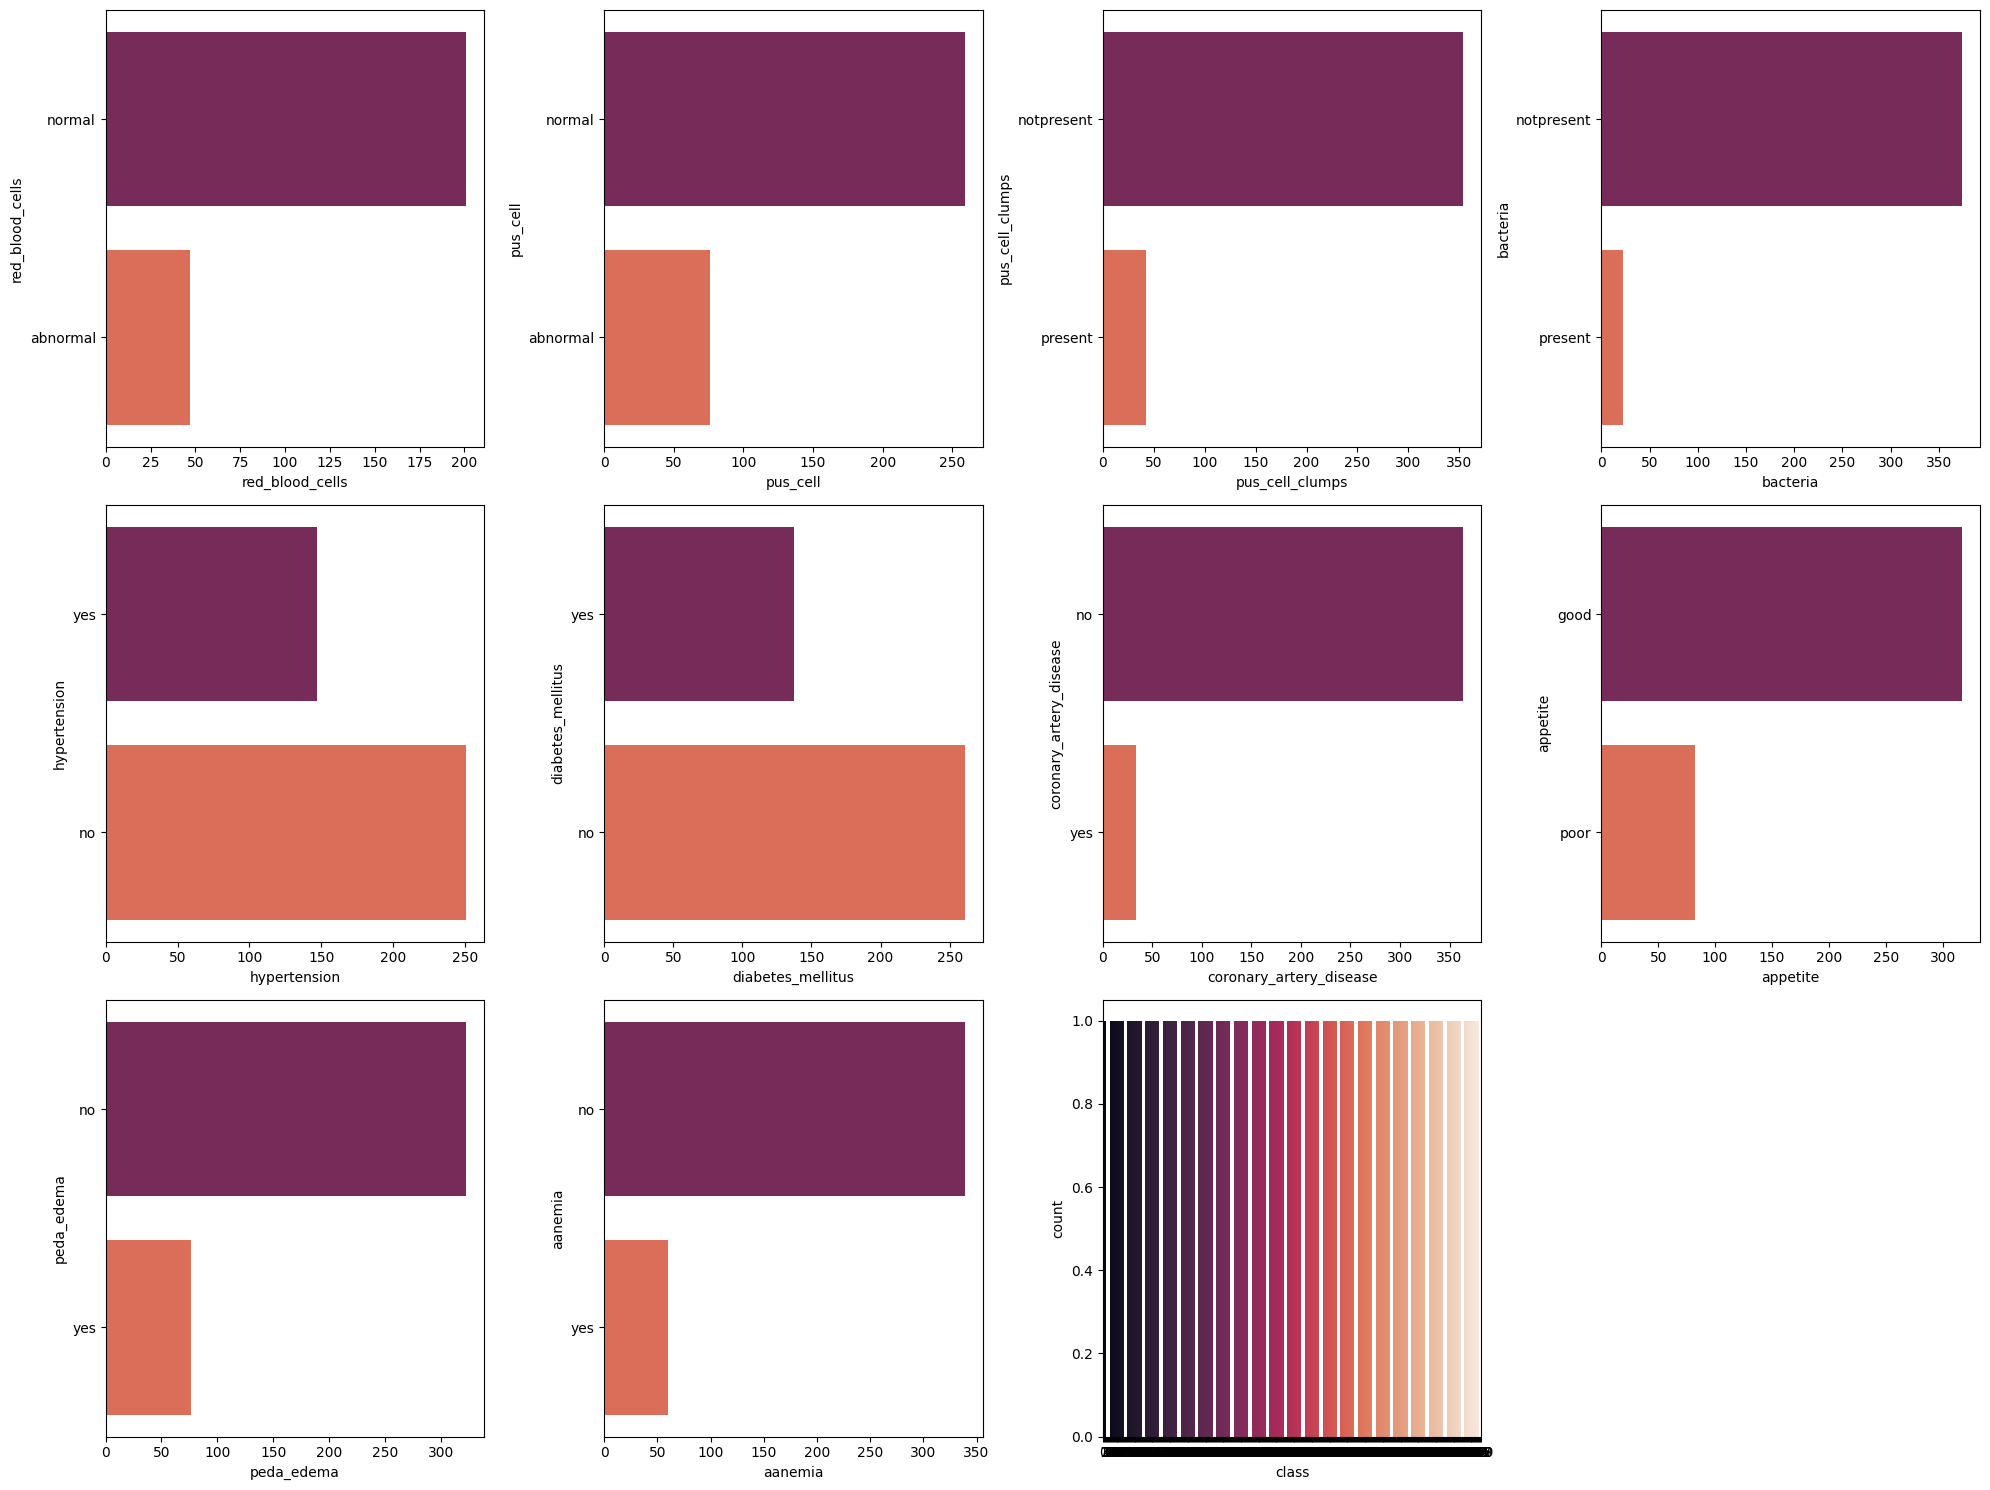

In [ ]:
# looking at categorical columns

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in cat_cols:
    if plotnumber <= 11:
        ax = plt.subplot(3, 4, plotnumber)
        sns.countplot(kidney_data[column], palette = 'rocket')
        plt.xlabel(column)

    plotnumber += 1

plt.tight_layout()
plt.show()

In [ ]:
# checking for null values

kidney_data.isna().sum().sort_values(ascending = False)

,0
red_blood_cells,152
red_blood_cell_count,131
white_blood_cell_count,106
potassium,88
sodium,87
packed_cell_volume,71
pus_cell,65
haemoglobin,52
sugar,49
specific_gravity,47


<Axes: >

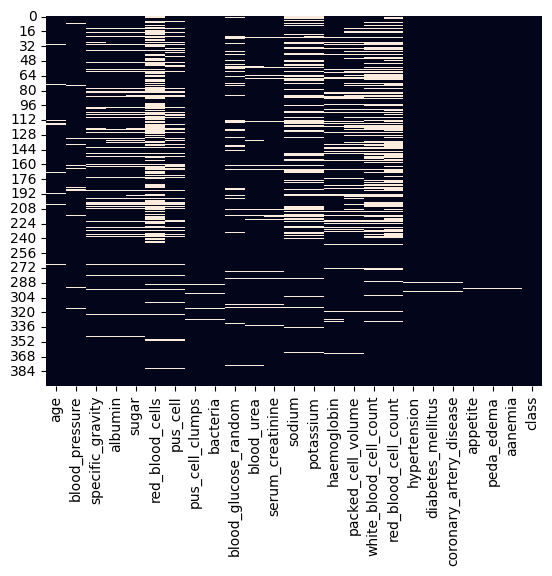

In [ ]:
sns.heatmap(kidney_data.isnull(), cbar=False)

In [ ]:
kidney_data[num_cols].isnull().sum()

,0
age,9
blood_pressure,12
specific_gravity,47
albumin,46
sugar,49
blood_glucose_random,44
blood_urea,19
serum_creatinine,17
sodium,87
potassium,88


In [ ]:
kidney_data[cat_cols].isnull().sum()

,0
red_blood_cells,152
pus_cell,65
pus_cell_clumps,4
bacteria,4
hypertension,2
diabetes_mellitus,2
coronary_artery_disease,2
appetite,1
peda_edema,1
aanemia,1


In [ ]:
# filling null values, we will use two methods, random sampling for higher null values and
# mean/mode sampling for lower null values

def random_value_imputation(feature):
    random_sample = kidney_data[feature].dropna().sample(kidney_data[feature].isna().sum())
    random_sample.index = kidney_data[kidney_data[feature].isnull()].index
    kidney_data.loc[kidney_data[feature].isnull(), feature] = random_sample

def impute_mode(feature):
    mode = kidney_data[feature].mode()[0]
    kidney_data[feature] = kidney_data[feature].fillna(mode)

In [ ]:
# filling num_cols null values using random sampling method

for col in num_cols:
    random_value_imputation(col)

In [ ]:
kidney_data[num_cols].isnull().sum()

,0
age,0
blood_pressure,0
specific_gravity,0
albumin,0
sugar,0
blood_glucose_random,0
blood_urea,0
serum_creatinine,0
sodium,0
potassium,0


In [ ]:
# filling "red_blood_cells" and "pus_cell" using random sampling method and rest of cat_cols using mode imputation

random_value_imputation('red_blood_cells')
random_value_imputation('pus_cell')

for col in cat_cols:
    impute_mode(col)

In [ ]:
kidney_data[cat_cols].isnull().sum()

,0
red_blood_cells,0
pus_cell,0
pus_cell_clumps,0
bacteria,0
hypertension,0
diabetes_mellitus,0
coronary_artery_disease,0
appetite,0
peda_edema,0
aanemia,0


Feature Encoding

In [ ]:
for col in cat_cols:
    print(f"{col} has {kidney_data[col].nunique()} categories\n")

red_blood_cells has 2 categories

pus_cell has 2 categories

pus_cell_clumps has 2 categories

bacteria has 2 categories

hypertension has 2 categories

diabetes_mellitus has 2 categories

coronary_artery_disease has 2 categories

appetite has 2 categories

peda_edema has 2 categories

aanemia has 2 categories

class has 2 categories



As all of the categorical columns have 2 categories we can use label encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
    kidney_data[col] = le.fit_transform(kidney_data[col])

In [ ]:
kidney_data.head(5)

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44.0,7800.0,5.2,1,1,0,0,0,0,1
1,7.0,50.0,1.020,4.0,0.0,0,1,0,0,158.0,...,38.0,6000.0,5.6,0,0,0,0,0,0,1
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,3.9,0,1,0,1,0,1,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,1,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,0,0,0,0,0,1


In [ ]:
#checking the distribution of the status value
kidney_data['class'].value_counts()

,count
class,
1,250
0,150


1- Have CKD
0- Do not have CKD

Splitting the feature and Class

In [ ]:
X = kidney_data.drop(columns=['class'],axis=1)
Y = kidney_data['class']

In [ ]:
print(X)

      age  blood_pressure  specific_gravity  albumin  sugar  red_blood_cells  \
0    48.0            80.0             1.020      1.0    0.0                1   
1     7.0            50.0             1.020      4.0    0.0                0   
2    62.0            80.0             1.010      2.0    3.0                1   
3    48.0            70.0             1.005      4.0    0.0                1   
4    51.0            80.0             1.010      2.0    0.0                1   
..    ...             ...               ...      ...    ...              ...   
395  55.0            80.0             1.020      0.0    0.0                1   
396  42.0            70.0             1.025      0.0    0.0                1   
397  12.0            80.0             1.020      0.0    0.0                1   
398  17.0            60.0             1.025      0.0    0.0                1   
399  58.0            80.0             1.025      0.0    0.0                1   

     pus_cell  pus_cell_clumps  bacteri

In [ ]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
395    0
396    0
397    0
398    0
399    0
Name: class, Length: 400, dtype: int64


In [ ]:
#Splitiing the data into training data and test data
X_train,X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [ ]:
X.shape, X_train.shape, X_test.shape

((400, 24), (320, 24), (80, 24))

In [ ]:
Models = {
    "Logistic Regression" : LogisticRegression(),
    "Support Vector Machine" : SVC(),
    "K-Nearest Neighbors" : KNeighborsClassifier(),
    "Random Forest" : RandomForestClassifier(),
    "AdaBoost" : AdaBoostClassifier(),
    "Gradient Boosting" : GradientBoostingClassifier(),
    "Decision Tree" : DecisionTreeClassifier()
}

for i in range (len(Models)):
  Model = list(Models.values())[i]
  Model.fit(X_train, Y_train)  # Train the model

  #Make Prediction
  Y_train_pred = Model.predict(X_train)
  Y_test_pred = Model.predict(X_test)

  # Training set performance
  Model_train_accuracy = accuracy_score(Y_train, Y_train_pred)*100
  Model_train_f1 = f1_score(Y_train, Y_train_pred,average = "weighted")*100
  Model_train_precision = precision_score(Y_train, Y_train_pred)*100
  Model_train_recall = recall_score(Y_train, Y_train_pred)*100
  Model_train_roc_auc = roc_auc_score(Y_train, Y_train_pred)*100

  # Test set performance
  Model_test_accuracy = accuracy_score(Y_test, Y_test_pred)*100
  Model_test_f1 = f1_score(Y_test, Y_test_pred,average = "weighted")*100
  Model_test_precision = precision_score(Y_test, Y_test_pred)*100
  Model_test_recall = recall_score(Y_test, Y_test_pred)*100
  Model_test_roc_auc = roc_auc_score(Y_test, Y_test_pred)*100

  print(list(Models.keys())[i])

  print("Model performance for Training set")
  print("--Accuracy:{:.4f}".format(Model_train_accuracy))
  print("--F1 Score:{:.4f}".format(Model_train_f1))
  print("--Precision:{:.4f}".format(Model_train_precision))
  print("--Recall:{:.4f}".format(Model_train_recall))
  print("--Roc Auc Score:{:.4f}".format(Model_train_roc_auc))
  print(".............................................")
  print("Model performance for Test set")
  print("--Accuracy:{:.4f}".format(Model_test_accuracy))
  print("--F1 Score:{:.4f}".format(Model_test_f1))
  print("--Precision:{:.4f}".format(Model_test_precision))
  print("--Recall:{:.4f}".format(Model_test_recall))
  print("--Roc Auc Score:{:.4f}".format(Model_test_roc_auc))
  print(f"Confusion Matrix :- \n{confusion_matrix(Y_test, Y_test_pred)}\n")
  print(f"Classification Report :- \n {classification_report(Y_test, Y_test_pred)}")
  print('='*35)
  print('\n')

Logistic Regression
Model performance for Training set
--Accuracy:90.0000
--F1 Score:90.0404
--Precision:93.1579
--Recall:90.3061
--Roc Auc Score:89.9111
.............................................
Model performance for Test set
--Accuracy:85.0000
--F1 Score:85.4444
--Precision:97.7273
--Recall:79.6296
--Roc Auc Score:87.8917
Confusion Matrix :- 
[[25  1]
 [11 43]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.69      0.96      0.81        26
           1       0.98      0.80      0.88        54

    accuracy                           0.85        80
   macro avg       0.84      0.88      0.84        80
weighted avg       0.89      0.85      0.85        80



Support Vector Machine
Model performance for Training set
--Accuracy:61.2500
--F1 Score:46.5310
--Precision:61.2500
--Recall:100.0000
--Roc Auc Score:50.0000
.............................................
Model performance for Test set
--Accuracy:67.5000
--F1 Score:54.4030


We will apply GridsearchCV method for hyperparameter tuning

In [ ]:
# list of models
models_list = [LogisticRegression(), SVC(), KNeighborsClassifier(), RandomForestClassifier(random_state=0), AdaBoostClassifier(), GradientBoostingClassifier(), DecisionTreeClassifier()]

In [ ]:
#creating a dictionary that contains hyperparameter values for the above mentioned models

model_hyperparameters = {
    'log_reg_hyperparameters': {
        'C' : [1,5,10,20],
        'max_iter' : [1000,5000,10000],
        'penalty':['l1', 'l2', 'elasticnet', None],
        'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
    },
    'svc_hyperparameters': {
        'kernel' : ['linear', 'poly', 'rbf' , 'sigmoid'],
        'C' : [1,5,10,20]
    },
    'KNN_hyperparameters': {
        'n_neighbors' : [3,5,10]
    },
    'random_forest_hyperparameters' : {
        "max_depth" :[5,8,15,None,50,100],
        "max_features" : [5,8,15,None,"auto"],
        "min_samples_split" : [2,8,15,20],
        "n_estimators" : [10, 20,50,100]
    },
    'AdaBoost_hyperparameters' : {
        'n_estimators' : [10, 20,50,100],
        'learning_rate' : [0.001, 0.01, 0.1],
    },
    'GradientBoosting_hyperparameters' : {
        'n_estimators' : [10, 20,50,100],
        'learning_rate' : [0.001, 0.01],
    },
    'DecisionTree_hyperparameters' : {
        'criterion' : ['gini', 'entropy'],
        'splitter' : ['best', 'random']
    }
}

In [ ]:
model_keys = list(model_hyperparameters.keys())
print(model_keys)

['log_reg_hyperparameters', 'svc_hyperparameters', 'KNN_hyperparameters', 'random_forest_hyperparameters', 'AdaBoost_hyperparameters', 'GradientBoosting_hyperparameters', 'DecisionTree_hyperparameters']


In [ ]:
print(model_hyperparameters)

{'log_reg_hyperparameters': {'C': [1, 5, 10, 20], 'max_iter': [1000, 5000, 10000], 'penalty': ['l1', 'l2', 'elasticnet', None], 'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}, 'svc_hyperparameters': {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [1, 5, 10, 20]}, 'KNN_hyperparameters': {'n_neighbors': [3, 5, 10]}, 'random_forest_hyperparameters': {'max_depth': [5, 8, 15, None, 50, 100], 'max_features': [5, 8, 15, None, 'auto'], 'min_samples_split': [2, 8, 15, 20], 'n_estimators': [10, 20, 50, 100]}, 'AdaBoost_hyperparameters': {'n_estimators': [10, 20, 50, 100], 'learning_rate': [0.001, 0.01, 0.1]}, 'GradientBoosting_hyperparameters': {'n_estimators': [10, 20, 50, 100], 'learning_rate': [0.001, 0.01]}, 'DecisionTree_hyperparameters': {'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random']}}


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
def ModelSelection(list_of_models, model_hyperparameters):
  model_param = {}
  i=0
  for model in list_of_models:
    key = model_keys[i]
    params = model_hyperparameters[key]
    i+=1

    classifier = GridSearchCV(model, params, cv=5)
    # fitting the data to classifier
    classifier.fit(X_train,Y_train)
    model_param[model] = classifier.best_params_
  for model_name in model_param:
    print(f"----Best params for {model_name}----")
    print(model_param[model_name])

In [ ]:
ModelSelection(models_list, model_hyperparameters)

----Best params for LogisticRegression()----
{'C': 1, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'newton-cg'}
----Best params for SVC()----
{'C': 1, 'kernel': 'linear'}
----Best params for KNeighborsClassifier()----
{'n_neighbors': 3}
----Best params for RandomForestClassifier(random_state=0)----
{'max_depth': 5, 'max_features': 5, 'min_samples_split': 2, 'n_estimators': 50}
----Best params for AdaBoostClassifier()----
{'learning_rate': 0.1, 'n_estimators': 100}
----Best params for GradientBoostingClassifier()----
{'learning_rate': 0.01, 'n_estimators': 100}
----Best params for DecisionTreeClassifier()----
{'criterion': 'gini', 'splitter': 'random'}


Now we will apply best hyperparameters on all models and check evaluation report

In [ ]:
Models = {
    "Logistic Regression" : LogisticRegression(C= 5, max_iter= 1000, penalty= 'l2', solver= 'lbfgs'),
    "Support Vector Machine" : SVC(C= 20, kernel= 'linear'),
    "K-Nearest Neighbors" : KNeighborsClassifier(n_neighbors = 3),
    "AdaBoost" : AdaBoostClassifier(learning_rate= 0.1, n_estimators= 100),
    "Random Forest" : RandomForestClassifier(max_depth= 5, max_features= 15, min_samples_split= 15, n_estimators= 20),
    "Gradient Boosting" : GradientBoostingClassifier(learning_rate = 0.01, n_estimators= 50),
    "Decision Tree" : DecisionTreeClassifier(criterion= 'entropy', splitter= 'random')
}

for i in range (len(Models)):
  Model = list(Models.values())[i]
  Model.fit(X_train, Y_train)  # Train the model

  #Make Prediction
  Y_train_pred = Model.predict(X_train)
  Y_test_pred = Model.predict(X_test)

  # Training set performance
  Model_train_accuracy = accuracy_score(Y_train, Y_train_pred)*100
  Model_train_f1 = f1_score(Y_train, Y_train_pred,average = "weighted")*100
  Model_train_precision = precision_score(Y_train, Y_train_pred)*100
  Model_train_recall = recall_score(Y_train, Y_train_pred)*100
  Model_train_roc_auc = roc_auc_score(Y_train, Y_train_pred)*100

  # Test set performance
  Model_test_accuracy = accuracy_score(Y_test, Y_test_pred)*100
  Model_test_f1 = f1_score(Y_test, Y_test_pred,average = "weighted")*100
  Model_test_precision = precision_score(Y_test, Y_test_pred)*100
  Model_test_recall = recall_score(Y_test, Y_test_pred)*100
  Model_test_roc_auc = roc_auc_score(Y_test, Y_test_pred)*100

  print(list(Models.keys())[i])

  print("Model performance for Training set")
  print("--Accuracy:{:.4f}".format(Model_train_accuracy))
  print("--F1 Score:{:.4f}".format(Model_train_f1))
  print("--Precision:{:.4f}".format(Model_train_precision))
  print("--Recall:{:.4f}".format(Model_train_recall))
  print("--Roc Auc Score:{:.4f}".format(Model_train_roc_auc))
  print(".............................................")
  print("Model performance for Test set")
  print("--Accuracy:{:.4f}".format(Model_test_accuracy))
  print("--F1 Score:{:.4f}".format(Model_test_f1))
  print("--Precision:{:.4f}".format(Model_test_precision))
  print("--Recall:{:.4f}".format(Model_test_recall))
  print("--Roc Auc Score:{:.4f}".format(Model_test_roc_auc))
  print(f"Confusion Matrix :- \n{confusion_matrix(Y_test, Y_test_pred)}\n")
  print(f"Classification Report :- \n {classification_report(Y_test, Y_test_pred)}")
  print('='*35)
  print('\n')

Logistic Regression
Model performance for Training set
--Accuracy:97.1875
--F1 Score:97.1896
--Precision:97.9487
--Recall:97.4490
--Roc Auc Score:97.1116
.............................................
Model performance for Test set
--Accuracy:97.5000
--F1 Score:97.5000
--Precision:98.1481
--Recall:98.1481
--Roc Auc Score:97.1510
Confusion Matrix :- 
[[25  1]
 [ 1 53]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        26
           1       0.98      0.98      0.98        54

    accuracy                           0.97        80
   macro avg       0.97      0.97      0.97        80
weighted avg       0.97      0.97      0.97        80



Support Vector Machine
Model performance for Training set
--Accuracy:95.6250
--F1 Score:95.6372
--Precision:97.3958
--Recall:95.4082
--Roc Auc Score:95.6880
.............................................
Model performance for Test set
--Accuracy:96.2500
--F1 Score:96.2987
-

Based on Accuracy score, Classification report and Confusion matrix, Random Forest is the best model.

Model Training

In [ ]:
classifier = RandomForestClassifier(max_depth= 5, max_features= 15, min_samples_split= 15, n_estimators= 20)

In [ ]:
#training the Logistic Regression
classifier.fit(X_train,Y_train)

RandomForestClassifier(max_depth=5, max_features=15, min_samples_split=15,
                       n_estimators=20)

Model evaluation

Accuracy score of training data

In [ ]:
# accuracy score of the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

In [ ]:
print("Accuracy score of the training data : ", training_data_accuracy)

Accuracy score of the training data :  0.99375


Accuracy score of test data

In [ ]:
# accuracy score of the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

In [ ]:
print("Accuracy score of the test data : ", test_data_accuracy)

Accuracy score of the test data :  0.975


Confusion matrix and Classification report  

Confusion Matrix :- 
[[24  2]
 [ 0 54]]



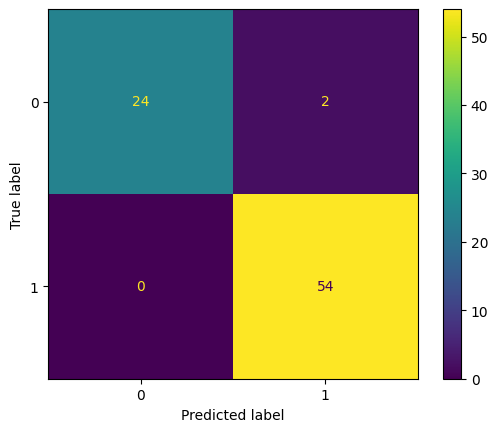

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      0.92      0.96        26
           1       0.96      1.00      0.98        54

    accuracy                           0.97        80
   macro avg       0.98      0.96      0.97        80
weighted avg       0.98      0.97      0.97        80



In [ ]:
print(f"Confusion Matrix :- \n{confusion_matrix(Y_test, X_test_prediction)}\n")
cm = confusion_matrix(Y_test, X_test_prediction, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classifier.classes_)
disp.plot()
plt.show()
print(f"Classification Report :- \n {classification_report(Y_test, X_test_prediction)}")

Making Prediction system

In [ ]:
input_data =(63,70,1.01,4,3,1,0,1,1,214,96,6.3,120,3.9,9.4,28,11500,3.3,1,1,1,0,1,1)
#changing the input data as numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array as we are predicting one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = classifier.predict(input_data_reshaped)
print(prediction)

if(prediction[0] == 0):
  print("The person don't have Kidney disease")
else:
  print("The person have Kidney disease")

[1]
The person have Kidney disease


Saving the training model

In [ ]:
import pickle
filename = 'kidney_model.sav'
pickle.dump(classifier, open(filename,'wb'))

In [ ]:
#loading the saved model
kidney_loaded_model = pickle.load(open('kidney_model.sav','rb'))

In [ ]:
input_data =(40,80,1.025,0,0,1,1,0,0,140,10,1.2,135,5,15,48,10400,4.5,0,0,0,0,0,0)
#changing the input data as numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array as we are predicting one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = classifier.predict(input_data_reshaped)
print(prediction)

if(prediction[0] == 0):
  print("The person don't have kidney disease")
else:
  print("The person have kidney disease")


[0]
The person don't have kidney disease
